# Convolutional Neural Network

Build a convolutional neural network with TensorFlow.

This example is using TensorFlow layers API, see 'convolutional_network_raw' example
for a raw TensorFlow implementation with variables.



## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

The first step is to import the classes and functions needed

In [39]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

import numpy
import matplotlib.pyplot as plt

Then we initialize the random number generator to a constant seed value for reproducibility of results.

In [40]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

## Load the data
Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [41]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Then we normalize the pixel values to the range 0 and 1 and one hot encode the output variables.

In [42]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

## Define the network architecture.

1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectifier activation function.
6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

# Compile the model
The model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [43]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

## Fit the model
Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classification error rate is printed.

In [44]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.2391 - accuracy: 0.9319 - val_loss: 0.0681 - val_accuracy: 0.9802 - 3s/epoch - 9ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0696 - accuracy: 0.9793 - val_loss: 0.0483 - val_accuracy: 0.9846 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0395 - val_accuracy: 0.9872 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0396 - accuracy: 0.9879 - val_loss: 0.0369 - val_accuracy: 0.9881 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0320 - accuracy: 0.9893 - val_loss: 0.0391 - val_accuracy: 0.9867 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0366 - val_accuracy: 0.9868 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0332 - val_accuracy: 0.9891 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0400 - val_accuracy: 0.9867 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 2s 

In [45]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [109]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = numpy.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*numpy.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(np.arange(0, 1.1, 0.1))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = numpy.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [110]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

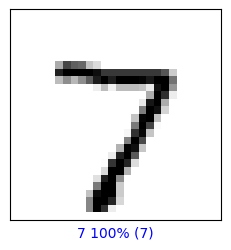

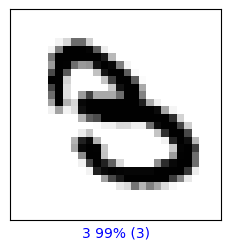

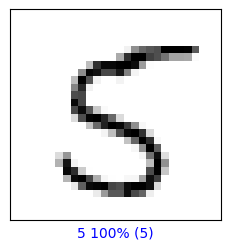

In [111]:
list = [0,18, 1460]
for i in list:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, y_test, X_test)

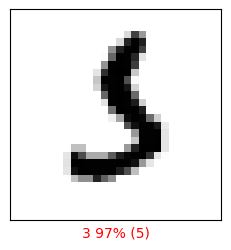

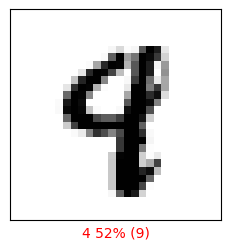

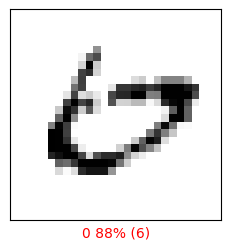

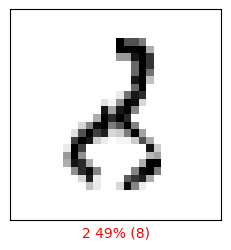

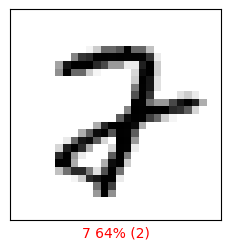

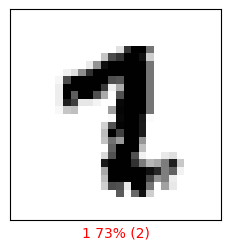

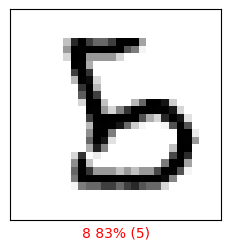

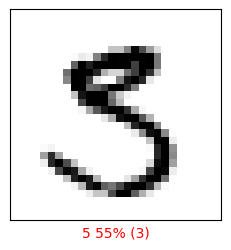

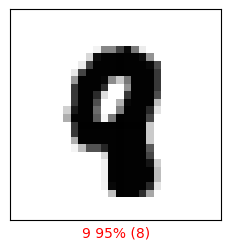

In [112]:
def plot_wrong(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    predicted_label = numpy.argmax(predictions_array)
    if predicted_label == true_label:
        pass
    else:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, predictions, y_test, X_test)

for i in range(1000):
    plot_wrong(i, predictions, y_test, X_test)

In [50]:
# Credit to Jason Brownlee
# https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

Find the image with the smallest maximum probability.

Index of image with smallest maximum probability: 9679


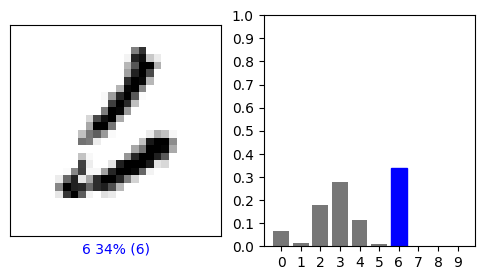

The ten predicted probabilities are:[6.7443773e-02 1.2389170e-02 1.7902151e-01 2.7787828e-01 1.1503381e-01
 1.0200549e-02 3.3800638e-01 7.2199637e-06 1.6353246e-05 2.9132923e-06]


In [113]:
import numpy as np

def find_image_smallest_max_prob(predictions):
    max_probs = np.max(predictions, axis=1)
    return np.argmin(max_probs)

index_smallest_max_prob = find_image_smallest_max_prob(predictions)
print("Index of image with smallest maximum probability:", index_smallest_max_prob)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_smallest_max_prob, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(index_smallest_max_prob, predictions, y_test)
plt.show()
print(f'The ten predicted probabilities are:{predictions[index_smallest_max_prob]}')



Find the image with the largest "second-highest" probability.  

Index of image with largest second-highest probability: 9019


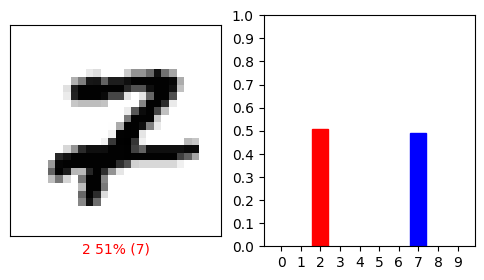

The ten predicted probabilities are:[2.4505462e-10 4.9521550e-05 5.0882554e-01 5.8283267e-06 2.6064706e-09
 5.6211480e-10 7.7802178e-14 4.9111629e-01 2.8392431e-06 6.7063568e-09]


In [114]:
def find_image_largest_second_highest_prob(predictions):
    top2_probs = np.partition(predictions, -2)[:, -2]
    return np.argmax(top2_probs)

index_largest_second_highest_prob = find_image_largest_second_highest_prob(predictions)
print("Index of image with largest second-highest probability:", index_largest_second_highest_prob)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_largest_second_highest_prob, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(index_largest_second_highest_prob, predictions, y_test)
plt.show()
print(f'The ten predicted probabilities are:{predictions[index_largest_second_highest_prob]}')



Find the image that causes the largest cross-entropy loss


Index of image with largest cross-entropy loss: 2654


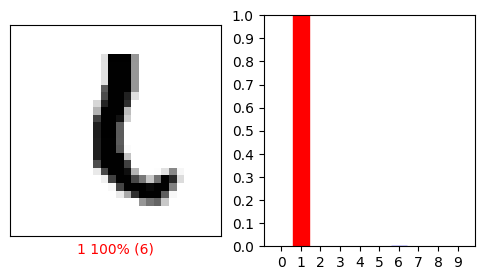

The ten predicted probabilities are:[2.4505462e-10 4.9521550e-05 5.0882554e-01 5.8283267e-06 2.6064706e-09
 5.6211480e-10 7.7802178e-14 4.9111629e-01 2.8392431e-06 6.7063568e-09]


In [116]:
def find_image_largest_cross_entropy_loss(predictions, true_labels):
    # Convert true_labels to one-hot encoding
    true_labels_one_hot = np.eye(predictions.shape[1])[true_labels]

    # Calculate cross-entropy losses
    cross_entropy_losses = -np.sum(true_labels_one_hot * np.log(predictions + 1e-10), axis=1)

    # Find the index of the image with the largest cross-entropy loss
    return np.argmax(cross_entropy_losses)

index_largest_cross_entropy_loss = find_image_largest_cross_entropy_loss(predictions, y_test)
print("Index of image with largest cross-entropy loss:", index_largest_cross_entropy_loss)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_largest_cross_entropy_loss, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(index_largest_cross_entropy_loss, predictions, y_test)
plt.show()

predictions[index_largest_cross_entropy_loss]
print(f'The ten predicted probabilities are:{predictions[index_largest_second_highest_prob]}')



Create a random integer in the range of 0 to N, where N is the number of images in the training set.  Grab the image at that index and save it as a .png file.  (Will update this question with an appropriate Python library for this part.)

In [118]:
import random

# Assuming 'X_train' contains your training images (numpy array or list of images)
# and 'N' is the number of training images
N = len(X_train)

# Generate a random integer in the range [0, N)
random_index = random.randint(0, N - 1)

# Get the image at the random index
random_image = X_train[random_index]  # Adjust this according to your data structure

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(random_image, cmap='gray')  # Adjust the cmap according to your image data

# Remove the axis labels and ticks
ax.axis('off')

# Save the image as a .png file
output_file_path = f"random_image_{random_index}.png"
plt.savefig(output_file_path, bbox_inches='tight', pad_inches=0, format='png')

print(f"Saved random image at index {random_index} to {output_file_path}")

# Close the Matplotlib figure to release resources
plt.close(fig)


Saved random image at index 17393 to random_image_17393.png


Create a hand-written digit and upload the file to either Google Drive or your Google Colab workspace.  Read the file into your Google Colab notebook and classify it (run it through the model).

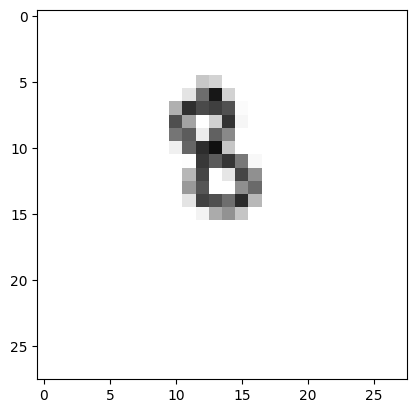

In [119]:
from PIL import Image
import numpy as np
image = Image.open("blank_140px_x_140px.png")
img = image.resize((28,28))
plt.imshow(img)

1/1 [==============================] - 0s 18ms/step


8

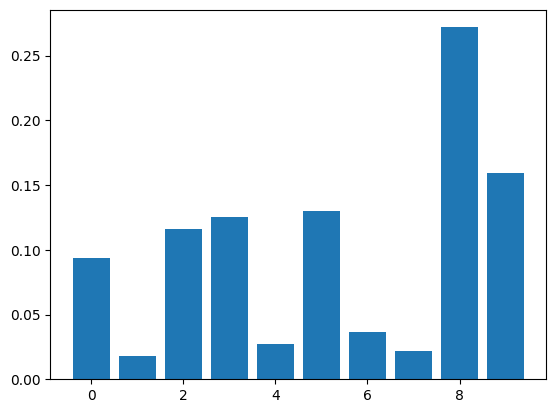

In [120]:
img = np.resize(img, (28,28,1)).astype('float32')
im2arr = np.array(img)
im2arr = im2arr/255
im2arr = im2arr.reshape(1,28,28,1)
one_prediction = model.predict(im2arr)
one_prediction

plt.bar(range(10), one_prediction[0])
predict_label = numpy.argmax(one_prediction)
predict_label

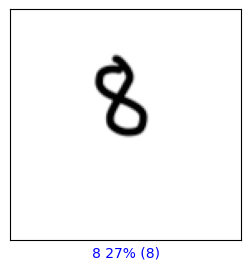

In [121]:
def plot_handwritten_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
predict_label = numpy.argmax(one_prediction)
plt.figure(figsize=(6,3))
plot_handwritten_image(one_prediction, 8, image)